In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def plot_distribution(samples, probability_fn, density_fn, title, *fn_args):

    f, ax = plt.subplots(1, 2)
    f.suptitle(title)

    ax[0].set_title("Probability")
    ax[0].plot(samples, probability_fn(samples, *fn_args))

    ax[1].set_title("Density")
    ax[1].plot(samples, density_fn(samples, *fn_args))

# Task 1. Create Generators: Uniform, Exponential, Power

In [55]:
size = 100

In [31]:
scale = 1
exponential_samples = np.array(sorted(np.random.exponential(scale, size)))

def exponential_density(data, scale):
    return scale*(np.exp(-scale*data))

def exponential_probability(data, scale):
    return 1 - np.exp(-scale*data)

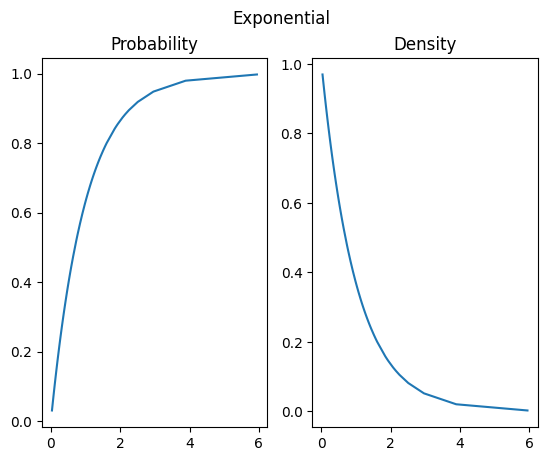

In [37]:
plot_distribution(exponential_samples, exponential_probability, exponential_density, "Exponential", scale)

In [49]:
a, b = 0, 1
uniform_samples = np.array(sorted(np.random.uniform(a, b, size)))

def uniform_density(data, a, b):
    return np.full(data.shape, 1/(b-a))

def uniform_probability(data, a, b):
    return (data - a)/(b-a)

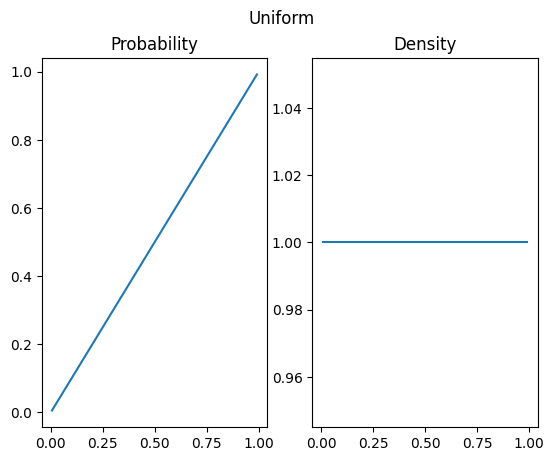

In [50]:
plot_distribution(uniform_samples, uniform_probability, uniform_density, "Uniform", a, b)

In [53]:
alpha = 3
power_samples = np.array(sorted(np.random.power(alpha, size)))

def power_probability(data, alpha):
    return data**alpha

def power_density(data, alpha):
    return alpha*(data**(alpha - 1))

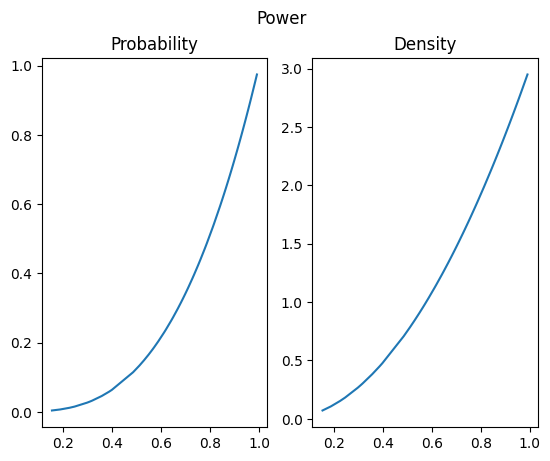

In [54]:
plot_distribution(power_samples, power_probability, power_density, "Power", alpha)

# Parzen-Rozenblatt density estimation

In [57]:
def ParzenRozenblat(kernel, data, X, h):
    return [kernel((x - data)/h)/(h*len(data)) for x in X]

In [82]:
def Epanechnikov_Kernel(data):
    return sum(3*(1 - data**2)/4)

def Normal_Kernel(data, mean=0, std=0.1):
    return sum(np.exp(-0.5*((data - mean)/std)**2)/(2*np.pi*std**2)**0.5)

def Cauchy_Kernel(data):
    return sum(1 / (np.pi * (1 + data ** 2)))

In [98]:
def estimate_density(data, kernel, h=None, discretization=None):

    if h is None:
        h =  max(
            abs(min(data)),
            max(data)
        )

    if discretization is None:
        discretization = len(data)*10

    X = np.linspace(min(data), max(data), discretization)

    density = ParzenRozenblat(kernel, data, X, h)

    plt.scatter(X, density)

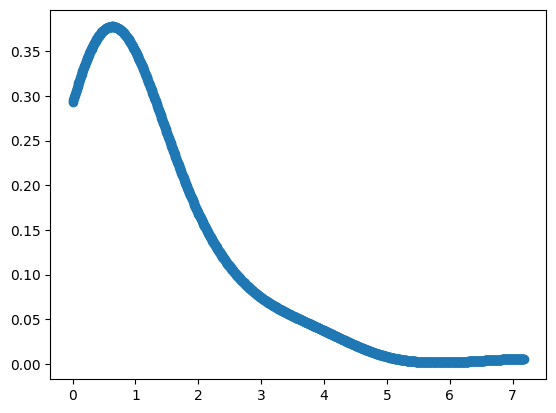

In [99]:
estimate_density(exponential_samples, Normal_Kernel)


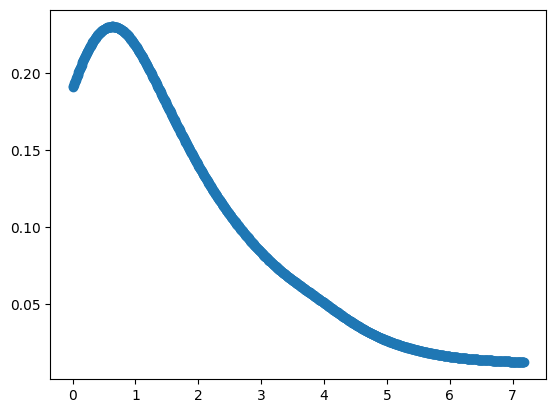

In [110]:
estimate_density(exponential_samples, Cauchy_Kernel, h=1)


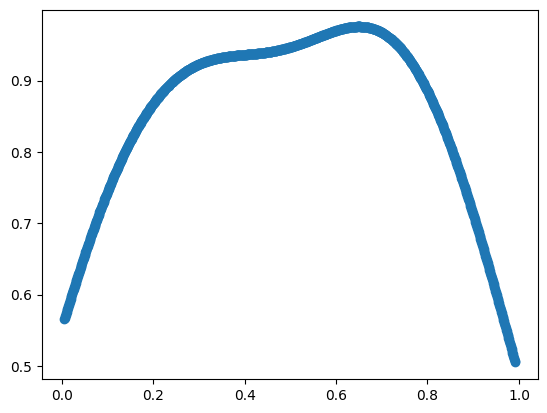

In [130]:
estimate_density(uniform_samples, Normal_Kernel, h=1.7)

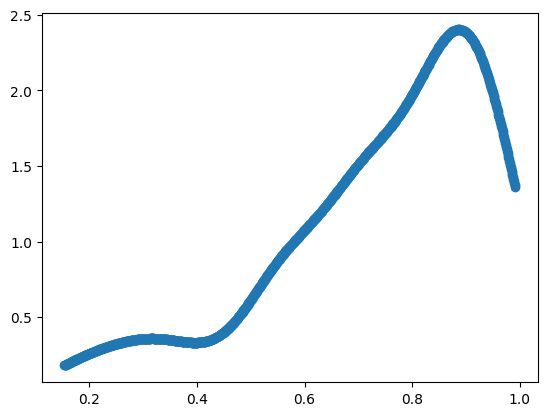

In [142]:
estimate_density(power_samples, Normal_Kernel, h=0.7)

# Leave One Out

In [147]:
def LOO(data, h):
    return -sum([np.log(ParzenRozenblat(
        Normal_Kernel,
        np.append(data[:i], data[i+1:]),
        [data[i]], 
        h
        )) for i in range(len(data))])

In [148]:
LOO(exponential_samples, 1)

array([621.74306509])

# Expectation-Maximization Algorithm

In [166]:
size=(100, 1)

Gaussian_mix = np.concatenate(
    (np.random.normal(size=size),
    np.random.normal(loc=1.5, scale=2, size=size)),
    axis=1
    ).reshape(-1, 1)


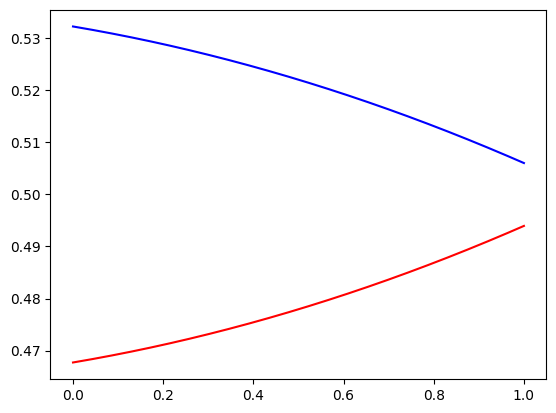

In [168]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, covariance_type='full', init_params='random',
                     random_state=0).fit(Gaussian_mix)

x = np.linspace(0, 1, 1000)
y_red = gm.predict_proba(np.array(x).reshape(-1, 1))[:,0]
y_blue = gm.predict_proba(np.array(x).reshape(-1, 1))[:,1]
plt.plot(x, y_red, color = 'red')
plt.plot(x, y_blue, color = 'blue') 

plt.show()